In [8]:
import Pkg; Pkg.activate(joinpath(@__DIR__,"simulate_ball_bounce")); 

Pkg.add("ForwardDiff")
Pkg.add("Plots")
Pkg.add("PlotlyJS")
Pkg.add("DifferentialEquations")
Pkg.add("Distributions")
Pkg.add("Arpack")
Pkg.add("SparseArrays")
Pkg.instantiate()

using ForwardDiff 
using LinearAlgebra
using Statistics
using Plots
plotlyjs()
using Printf
using Random
using DifferentialEquations
using Distributions
using Arpack
using SparseArrays

const FD = ForwardDiff;

PLOTS_DEFAULTS = Dict(:dpi => 600);

include("GeneralizedFunctionality/est_parameters.jl");
include("GeneralizedFunctionality/hybrid_system_simulation_tools.jl")
include("GeneralizedFunctionality/SKF_general.jl")
include("GeneralizedFunctionality/batch_estimation.jl")
include("GeneralizedFunctionality/generalized_saltation_calculations.jl")
include("DynamicSystems/4link_biped.jl") # Defines hybrid system functions

  Activating environment at `c:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Project.toml`
   Resolving package versions...
  No Changes to `C:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Project.toml`
  No Changes to `C:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Project.toml`
  No Changes to `C:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\14088\Documents\GitHub\OCRL-Walker-Project\juliaImplementation\juliaImplementation\src\simulate_ball_bounce\Project.toml`

set_params (generic function with 1 method)

# Nominal trajectory for four-link biped walker

The system dynamics, resets, and guards for the biped walker are defined here. 
`dynamics` holds the functions for the walker's behavior, `resets` defines the state-resetting functions upon hitting the ground, and `guards` determines the conditions for transitions between different modes of motion.

The nominal trajectory is plotted.

In [9]:
# system definition
dynamics = [unlocked_dynamics, locked_dynamics]
resets = [[idreset, kneestrike_reset],[heelstrike_reset, idreset]]
guards = [[idguard, kneestrike_guard],[heelstrike_guard, idguard]]

# initial states
mode0 = 1
xmean = [pi/9, pi/6, pi/3, 0, 0, 0]

# simulation times
t = 10 #10
dt = .01 #.1

# noise and measurement parameters - we probably won't need this
W = Diagonal([1.0,1.0,1.0,1.0,1.0,1.0])*0.1
V = Diagonal([1.0,1.0])*.001
C = [I zeros(2,4)]

# structure of all this
param = ESTParameters(C,V,W,dt,dynamics,resets,guards)

# simulate nominal trajectory
nom_states, _, _, nom_modes,nom_impact_states,_ = sim_system(xmean,mode0,dynamics,resets,guards,W*.000000000000001,V,C,t,dt);

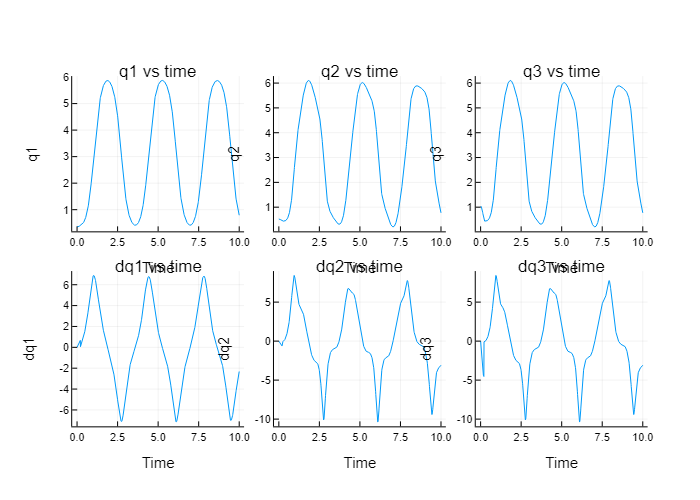

In [10]:
# plot each angle over time
timesteps = 0:dt:t 
p = plot(layout = (2, 3), size = (1000, 500))
    

state_names = ["q1", "q2", "q3", "dq1", "dq2", "dq3"]

for i in 1:6
    plot!(p[i], timesteps, [state[i] for state in nom_states],
          title = "$(state_names[i]) vs time",
          xlabel = "Time",
          ylabel = "$(state_names[i])",
          legend = false,
          titlefontsize = 12)
end

display(p)